In [1]:
import numpy as np
import matplotlib.pyplot as plt   
from scipy.integrate import odeint, solve_ivp

In [2]:
N1=1/0.002
N2=1/0.003
N5 = 1.5
N6=1.5
r1=0.1
r2= 0.3
r3= 0.2
r5=0.5
r6=0.35
a11=0.009
a12=0.009
a22=0.003
a1=0.0001
a2=0.0002
gemma5=2
gemma6=3
elip=40

def avg(x):
    '''
    Returns average value of list of int/float.
    ------------------------------------------
    input:
        x: must be a list
    '''
    return sum(x)/len(x)

In [3]:
def ode_RK4(f, X_0, dt, T):    
    N_t = int(round(T/dt))
    # Initial conditions
    usol = [X_0]
    u = np.copy(X_0)
    
    tt = np.linspace(0, N_t*dt, N_t + 1)
    # RK4
    for t in tt[:-1]:
        u1 = f(u + 0.5*dt* f(u, t), t + 0.5*dt)
        u2 = f(u + 0.5*dt*u1, t + 0.5*dt)
        u3 = f(u + dt*u2, t + dt)
        u = u + (1/6)*dt*( f(u, t) + 2*u1 + 2*u2 + u3)
        usol.append(u)
    return usol, tt


A = [26.9, 99.1, 37.7, 32.7]               
B = [0.00244, 0.00114, 0.000465, 0.00013]  
C = [243, 217, 200, 258]                   
D = [0, 0, 0, 0]                           

A0 = avg(A)  
B0 = avg(B)  
C0 = avg(C)  
D0 = avg(D)  

def f(u,t):
    x1,x2,x3,x4,x5,x6= u
    
    r1 = 0.3/(1+  np.exp(-2*   (A0/2 * np.exp(-B0*8 * (t - 196)**2) + D0)  ) + np.exp(-2*   (A0/4 * np.exp(-B0*8 * (t - 263)**2) + D0)  )) - 0.3/2
    r2 = 0.6/(1+  np.exp(-3*   (A0/2 * np.exp(-B0*8 * (t - 196)**2) + D0)  ) + np.exp(-2*   (A0/4 * np.exp(-B0*8 * (t - 263)**2) + D0)  )) - 0.6/2
    r3 = 0.35/(1+  np.exp(-10* (A0/2 * np.exp(-B0*8 * (t - 196)**2) + D0)  ) + np.exp(-2*   (A0/4 * np.exp(-B0*8 * (t - 263)**2) + D0)  )) - 0.35/2
    r4 = 0.43/(1+  np.exp(-7*  (A0/2 * np.exp(-B0*8 * (t - 196)**2) + D0)  ) + np.exp(-2*   (A0/4 * np.exp(-B0*8 * (t - 263)**2) + D0)  )) - 0.43/2
    r5 = 0.42/(1+  np.exp(-6*  (A0/2 * np.exp(-B0*8 * (t - 196)**2) + D0)  ) + np.exp(-2*   (A0/4 * np.exp(-B0*8 * (t - 263)**2) + D0)  )) - 0.42/2
    r6 = 0.18/(1+  np.exp(-5*  (A0/2 * np.exp(-B0*8 * (t - 196)**2) + D0)  ) + np.exp(-2*   (A0/4 * np.exp(-B0*8 * (t - 263)**2) + D0)  )) - 0.18/2
    
    d1 = r1*x1*(1-x1/N1)-a1*x1*x2
    d2 = r2*x2*(1-x2/N2)-a2*x1*x2
    d3 = x3*(r1-0.05*x4)
    d4 = x4*(-r2+0.01*x3)
    d5 = r5*x5-a11*x5**2+a12*x5*x6
    d6 = r6*x6-a22*x6**2 
    
    return np.asarray([d1,d2,d3,d4,d5,d6])

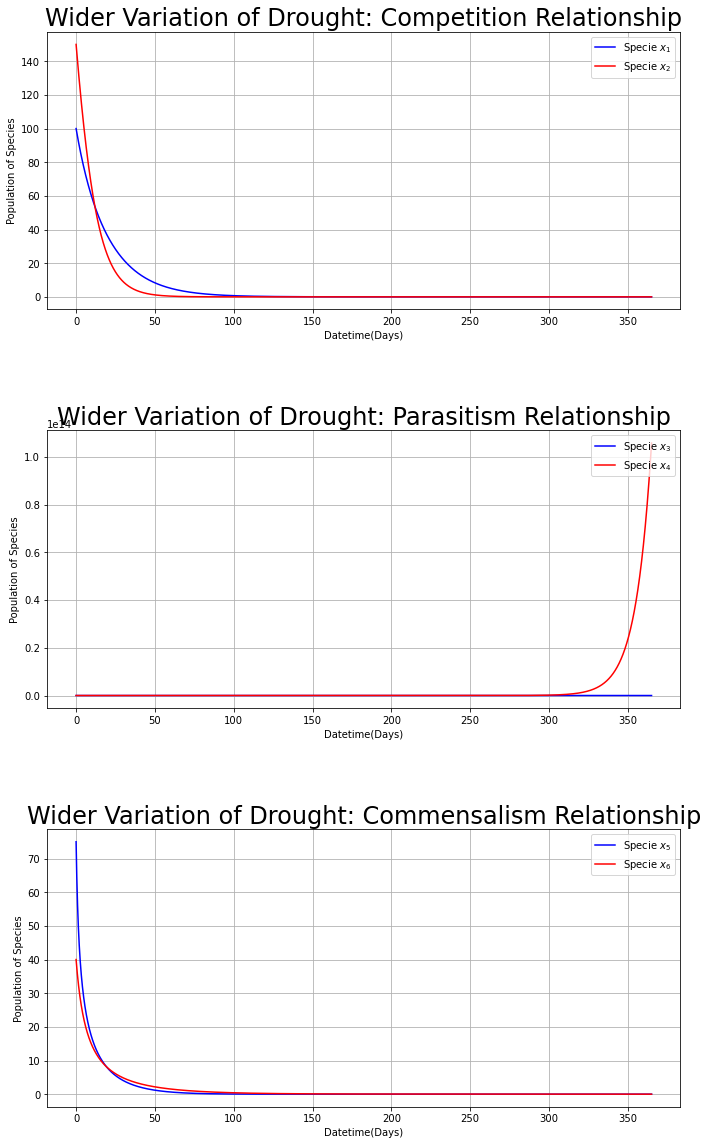

In [4]:
def fig2():
    global u1,u2,u3,u4,u5,u6
    u, t = ode_RK4(f, np.array([100,150,50,80,75,40]), 0.01, 365)
    u1 = [a[0] for a in u]
    u2 = [b[1] for b in u]
    u3 = [c[2] for c in u]
    u4 = [d[3] for d in u]
    u5 = [e[4] for e in u]
    u6 = [f[5] for f in u]
    fig,axs = plt.subplots(3,1,figsize=(12,18))
    fig.tight_layout(pad = 10.0)

    axs[0].set_ylabel('Population of Species')
    axs[0].set_xlabel('Datetime(Days)' )
    axs[0].set_title('Wider Variation of Drought: Competition Relationship', fontsize = 24  )
    axs[0].plot(t, u1, "b")
    axs[0].plot(t, u2, "r")
    axs[0].legend(['Specie $x_1$','Specie $x_2$'], loc = "upper right")
    axs[0].grid()

    axs[1].set_ylabel('Population of Species')
    axs[1].set_xlabel('Datetime(Days)' )
    axs[1].set_title('Wider Variation of Drought: Parasitism Relationship', fontsize = 24  )
    axs[1].plot(t, u3, "b")
    axs[1].plot(t, u4, "r")
    axs[1].legend(['Specie $x_3$','Specie $x_4$'], loc = "upper right")
    axs[1].grid()

    axs[2].set_ylabel('Population of Species')
    axs[2].set_xlabel('Datetime(Days)' )
    axs[2].set_title('Wider Variation of Drought: Commensalism Relationship' , fontsize = 24)
    axs[2].plot(t, u5, "b")
    axs[2].plot(t, u6, "r")
    axs[2].legend(['Specie $x_5$','Specie $x_6$'], loc = "upper right")
    axs[2].grid()

    
    plt.show()

fig2()
